<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib notebook


def tanh_switch(rho, kappa=5., theta=0.8):
    return 0.5 * (1 + np.tanh(kappa * (rho - theta)))


N = 500
r_switch_half = np.zeros([N,N])
r_switch_full = np.zeros([N,N])
kappas = np.linspace(-10,10,N)
thetas = np.linspace(0,4,N)
kap,the = np.meshgrid(kappas, thetas)

r_switch_half_filled = tanh_switch(0.5, kap, the)
r_switch_full_filled = tanh_switch(1.0, kap, the)
r_switch_threefourth_filled = tanh_switch(0.75, kap, the)
r_switch_quarter_filled = tanh_switch(0.25, kap, the)
r_switch_empty = tanh_switch(0.0, kap, the)



<IPython.core.display.Javascript object>


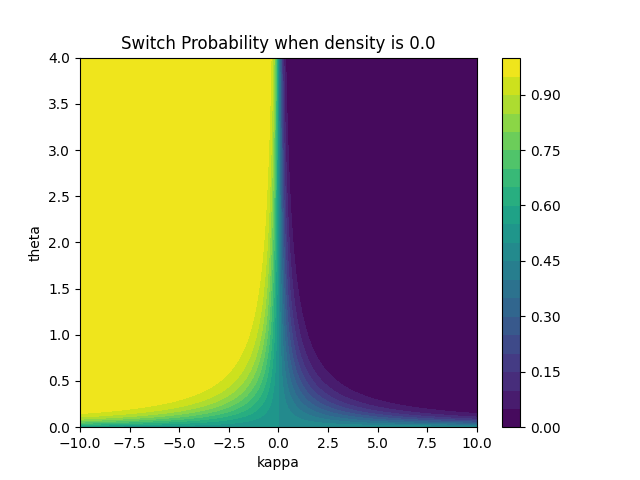

In [8]:
# Plot the surface.
fig = plt.figure()

plt.contourf(kappas, thetas, r_switch_empty, 20, cmap='viridis')
# Add a color bar which maps values to colors.
plt.colorbar()
plt.xlabel('kappa')
plt.ylabel('theta')
plt.title('Switch Probability when density is 0.0')
#plt.savefig('Resting Probability when density is 0.0.jpg')
plt.show()

<IPython.core.display.Javascript object>


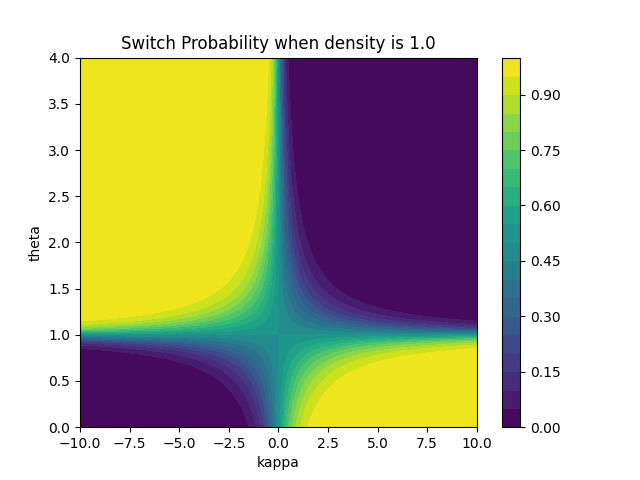

In [9]:
# Plot the surface.
fig = plt.figure()

plt.contourf(kappas, thetas, r_switch_full_filled, 20, cmap='viridis')
# Add a color bar which maps values to colors.
plt.colorbar()
plt.xlabel('kappa')
plt.ylabel('theta')
plt.title('Switch Probability when density is 1.0')
plt.show()

<IPython.core.display.Javascript object>


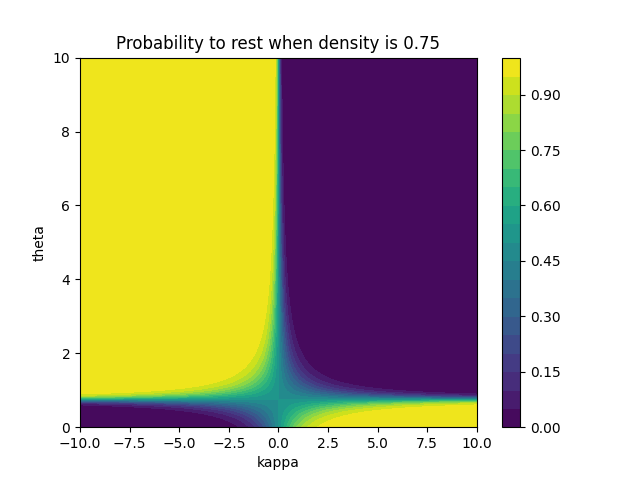

In [4]:
# Plot the surface.
fig = plt.figure()

plt.contourf(kappas, thetas, r_switch_threefourth_filled, 20, cmap='viridis')
# Add a color bar which maps values to colors.
plt.colorbar()
plt.xlabel('kappa')
plt.ylabel('theta')
plt.title('Probability to rest when density is 0.75')
#plt.savefig("threefourth.jpg")
plt.show()


<IPython.core.display.Javascript object>


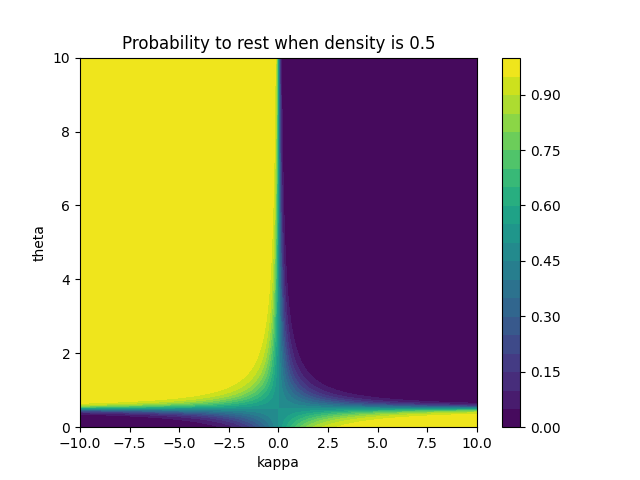

In [5]:
# Plot the surface.
fig = plt.figure()

plt.contourf(kappas, thetas, r_switch_half_filled, 20, cmap='viridis')
# Add a color bar which maps values to colors.
plt.colorbar()
plt.xlabel('kappa')
plt.ylabel('theta')
plt.title('Probability to rest when density is 0.5')
#plt.savefig("half.jpg")
plt.show()

<IPython.core.display.Javascript object>


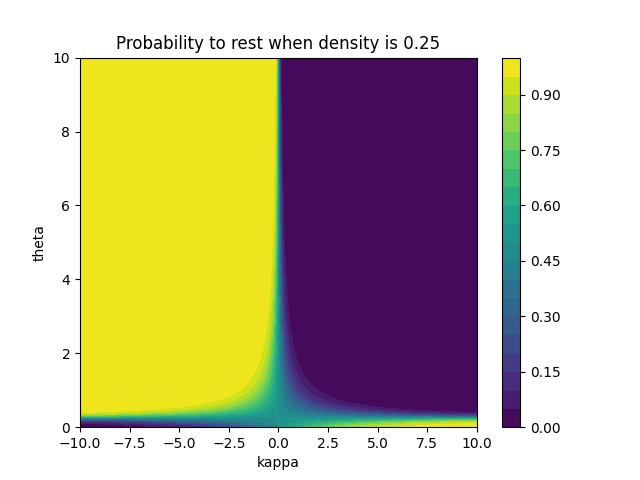

In [6]:
# Plot the surface.
fig = plt.figure()

plt.contourf(kappas, thetas, r_switch_quarter_filled, 20, cmap='viridis')
# Add a color bar which maps values to colors.
plt.colorbar()
plt.xlabel('kappa')
plt.ylabel('theta')
plt.title('Probability to rest when density is 0.25')
#plt.savefig("quarter.jpg")
plt.show()